# Predicting Telco Churn

by: DeAngelo Bowen
24 May, 2022


---


## Project Overview
---

## Objectives : 

- To observe key drivers of churn at Telco to determine primary causes to why customers are churning. 
- Construct a Machine Learning model using classification techniques to predict customer churn for a group of customers. 
- Deliver a report that is clear and highlights key findings and insights, while summarizing the processes taken to reach them. 
- To answer all questions regarding code, process, key takeaways, and models any stakeholder may have.
---

## Project Description :

**TelcoCo**, a telecommunications company, is rapidly churning customers at a rate of nearly **27% percent**. Why are the customers churning? How can they reduce customer churn? The minimum viable product (MVP) is a machine learning model that can accurately predict customer churn and make predictions that can be used to mak recommendations, that can produce potential change which will **shape TelcoCo's future**.

---

## Imports :

In [1]:
# import pandas for dataframe manipulation
import pandas as pd

# imports for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# import for statistical analysis
from scipy import stats as stats

# import for modeling data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

# import for process repitition, aquiring, and preparing TelcoCo data
import acquire as aq
import prepare as prep
import explore as ex
import model as md

---
# Preparation :

To acquire the telco data, I utilized the telco_churn database located in the CodeUp mySQL server. Here, I selected all columns from the customers table, then joined the contract_types, payment_types, and internet_service_types tables.

#### The SQL code is : 

> ```python
SELECT * FROM customers
        JOIN contract_types USING (contract_type_id)
        JOIN payment_types USING (payment_type_id)
        JOIN internet_service_types USING (internet_service_type_id);
```

### Following the aquisition of the data, I needed to prepare the data and split it into three working datasets:

- Train
- Validate
- Test

In [2]:
# calling the aquire.py file get_telco_data() function
telco = aq.get_telco_data()

# calling the prepare.py file and storing the prepped data in an attribute
df = prep.prep_telco(telco)

# splitting the prepared data into my 3 working datasets
train, validate, test = df

---

### Final Preparations :
1. Identified each of the features data types and manipulated relevant columns to integers.
2. Removed all irrelevant or duplicated columns. 
3. Encoded to numerical values (Changed Yes's to 1, No's to 0)
4. Renamed columns to more appropriate and identifiable naming conventions.
5. Repeated these steps on the split data for future modeling. 

---
# Exploring the Data

## The Goal :

#### The goal is to discover features that have the largest impact on the target variable Churn

### Questions related to drivers of churn : 
> - Is there unexpected services related to churn, and why? 
> - Are those who use mailed checks for payments more or less likely to churn?
> - Do customers who have dependents more likely to have longer tenure than those who do not? 
> - On average when do month to month customers churn? Is there a significant pattern of churns around a certain amount of tenure? 

### Vizualizing Churn :

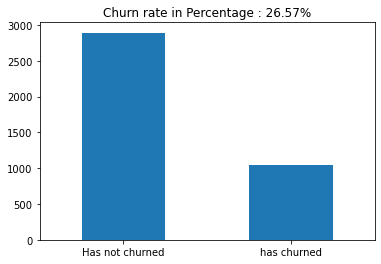

In [3]:
has_churned = (train.churn.mean() * 100)

percent = "{:.2f}".format(has_churned)

ax = train.churn.value_counts().sort_index().plot.bar()
plt.title(f'Churn rate in Percentage : {percent}%')
ax.set(xlabel=None)
ax.set_xticklabels(['Has not churned', 'has churned'], rotation=0)
plt.show()

### Takeaway : 
-  26.57% of Telco customers have churned over a lifetime period.
- This is over 5% of the national average of 21%. 
    - Source: [Statista.com](https://www.statista.com/statistics/816735/customer-churn-rate-by-industry-us/)
- With this knowledge in mind, let's look at the drivers of churn and what we can do to reduce churn.

### First, let's take a look at each feature and how they relate to churn:

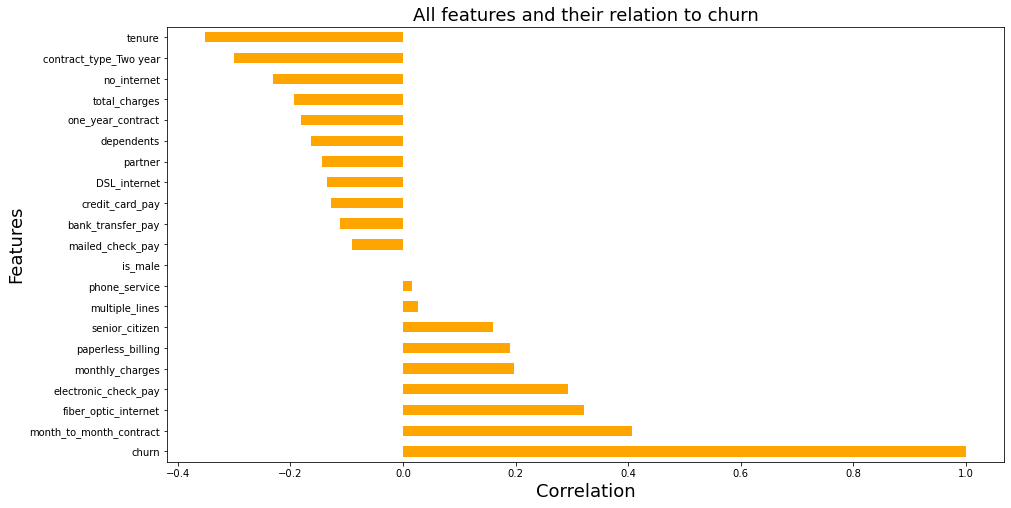

In [4]:
# exploration .py correlation chart function
ex.full_corr_chart()

#### *There are quite a few negative correlations to churn within the dataset, however, our goal is to find the drivers of churn, meaning we need those with a positive correlation with churn*

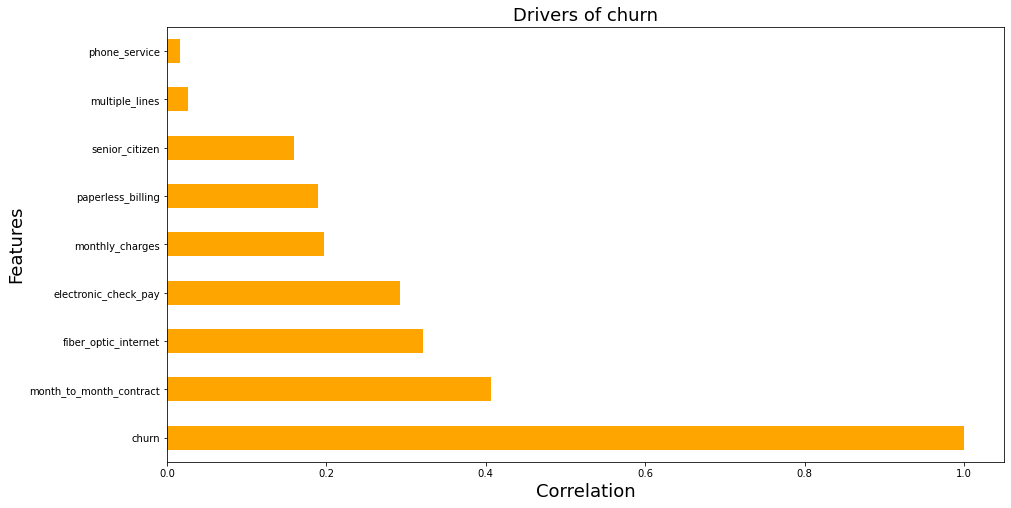

In [5]:
ex.churn_corr_chart()

### Takeaways :
- Drivers of Churn : 
    - Top 5: 
        - Paperless billing
        - High Monthly Charges
        - Electronic Payment Customers
        - Fiber Optic Internet 
        - Month to Month Contracts

# Question 1:
### Unexpected Services related to churn : 
- Based on the correlation graph, and count plots a major unexpected feature related to churn would be having fiber optic internet. Because of this obeservation, I will take a look at the internet service types.

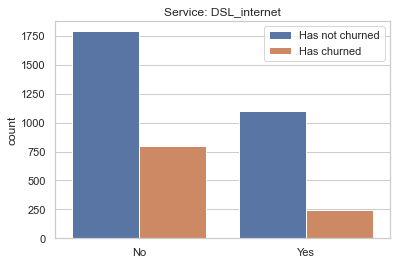

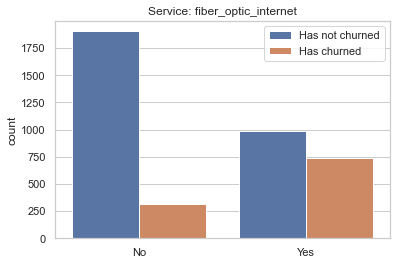

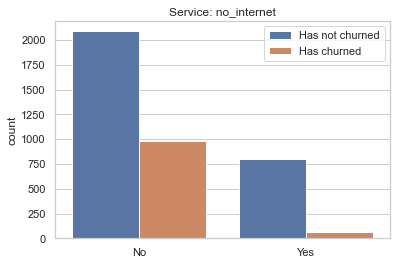

In [6]:
# check internet service types from original telco data
ex.check_internet_types()

### Hypothesis

#### ${H_0}$:  Fiber optic internet is independent of churning. They are not correlated.

#### ${H_a}$: Fiber optic internet and churning are dependent on one another and are correlated. 

*I will conduct a chi square test on fiber optic internet and churn.*

In [7]:
# set alpha
alpha = .05

In [8]:
variable = train.fiber_optic_internet
target = train.churn

observed = pd.crosstab(variable, target)

In [9]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

# test against the null and alternative hypothesis:
if p < alpha:
    print('I reject the null hypothesis that the variables are independent of one another. There is a correlation between them.')
else:
    print('I fail to reject the null hypothesis that the variables are independent of one another. There is no correlation between them')
    

I reject the null hypothesis that the variables are independent of one another. There is a correlation between them.


## Takeaways:
- DSL internet has the largest amount of customers by a short margin, with about 25% churn. 
- <code style="background:yellow;color:black">Fiber optic internet has a near 75% churn rate and are more likely to churn.</code>
- Those with no internet are less likely to churn. 
- Having multiple lines or not doesn't seem to have a strong correlaton to churn.

# Question 2:

### Is there a payment type strongly related to churn?

#### To find this out, let's run a countplot on all payment types: 

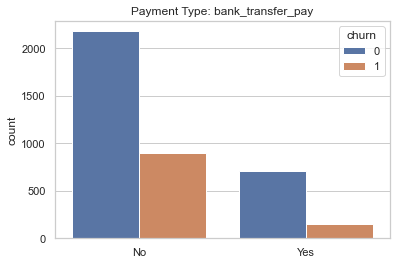

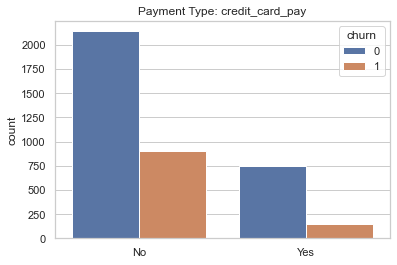

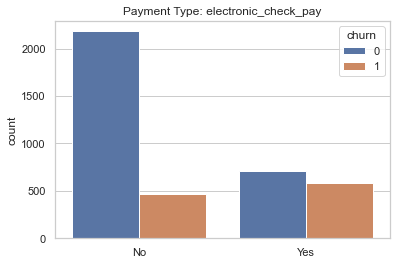

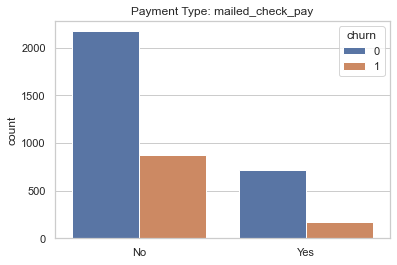

In [10]:
ex.check_payment_types()

### Hypothesis

#### ${H_0}$:  Paying by Electronic Check is independent of churning. They are not correlated.

#### ${H_a}$: Paying by Electronic Check and churning are dependent on one another and are correlated. 

I will conduct a chi square test on Electronic Check Pay and churn.

In [11]:
variable2 = train.electronic_check_pay

#re-used churn target
observed = pd.crosstab(variable, target)

chi2, p, degf, expected = stats.chi2_contingency(observed)

# test against the null and alternative hypothesis:
if p < alpha:
    print('I reject the null hypothesis that the variables are independent of one another. There is a correlation between them.')
else:
    print('I fail to reject the null hypothesis that the variables are independent of one another. There is no correlation between them')

I reject the null hypothesis that the variables are independent of one another. There is a correlation between them.


## Takeaways: 
- Bank transfer and mailed check pay nearly the same amount of customers and the same amount of churn. 
- Mailed Check Pay are less likely to churn
- <code style="background:yellow;color:black">Nearly all of the customers in electronic check pay have churned.</code>
- Credit card pay is the most popular service with a low churn rate.

## Question 3 : 

### Are customers who have dependents more likely to have longer tenure than those who do not?

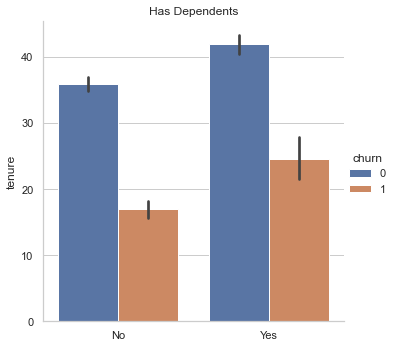

In [12]:
ex.dependents_and_tenure()

### Hypothesis

#### ${H_0}$:  Having Dependents is independent of having higher tenure. They are not correlated.

#### ${H_a}$: Having Dependents and higher tenure are dependent on one another and are correlated. 

I will conduct a 1 sample T-Test on Dependents and Tenure

In [13]:
dependents = train[train.dependents == 1].tenure
tenure_mean = train.tenure.mean()

t, p = stats.ttest_1samp(dependents, tenure_mean)

if p/2 < alpha:
    print('I reject the null hypothesis that the variables are independent of one another. There is a correlation between them.')
else:
    print('I fail to reject the null hypothesis that the variables are independent of one another. There is no correlation between them')
    

I reject the null hypothesis that the variables are independent of one another. There is a correlation between them.


## Takeaways:
- <code style="background:yellow;color:black">Those with dependents, whether they've churned or not, have higher tenure on average than those who dont.</code>

## Question 4 : 

### On average when do month to month customers churn?

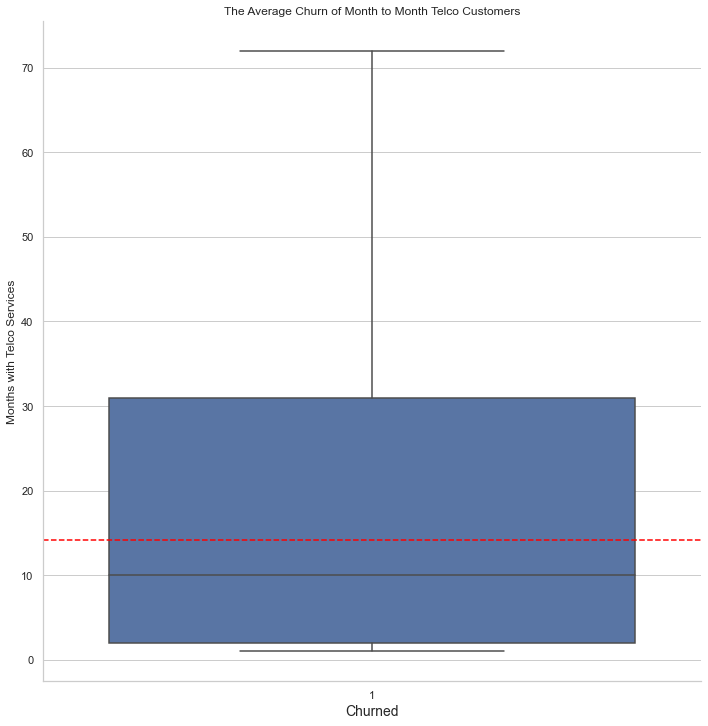

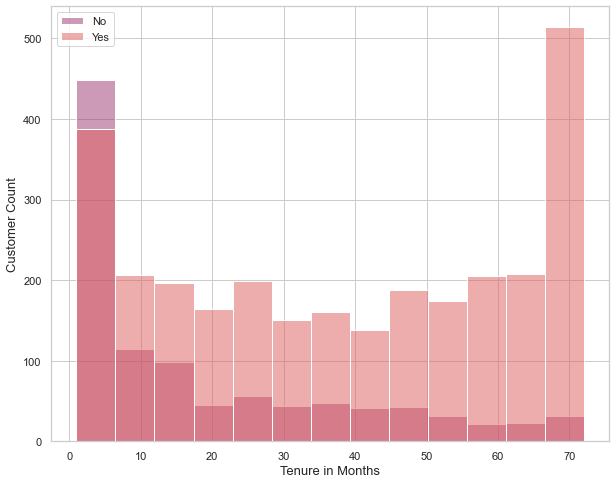

In [14]:
ex.month_to_month_average_churn()

## Takeaways:
- The average Tenure of month to month customers is 14 months.
- <code style="background:yellow;color:black">An overwhelming majority of cutomers with month to month service churn before their first 10 months.</code>

---

# Modeling

In [15]:
# calculate the baseline for the train dataset

baseline = (train.churn == 0).mean()
print(f'Our baseline accuracy is: {baseline}')

Our baseline accuracy is: 0.7343154686309372


### This baseline of 73% is the accuracy of the amount of customers that we will retain. 

---

###  *Our goal is to create a model that will return over 73% retention in customers.*

---

### To do this, first I have prepared the datasets for modeling : 

### Random Forest on Train and Validate :

#### I trained 11 models on train and validate data using random forest. Many of the models in the random forest classifier were at risk for overfitting data and potentially returning unbalanced results.

In [16]:
df1 = md.forest_model()
df1

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,1,11,0.919482,0.780213,0.139269
1,2,10,0.868936,0.790877,0.078059
2,3,9,0.849632,0.781398,0.068234
3,4,8,0.827534,0.783175,0.044358
4,5,7,0.822200,0.778436,0.043764
5,6,6,0.816612,0.778436,0.038176
6,7,5,0.808484,0.785545,0.022939
7,8,4,0.800356,0.781991,0.018365
8,9,3,0.792482,0.776659,0.015823
9,10,2,0.764542,0.751777,0.012764


#### Out of each Random Forest, the best performing model was almost identical to the baseline model. As a result, I moved to  K Nearest Neighbor.

In [17]:
df1[df1.difference == df1.difference.min()]

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
10,11,1,0.734315,0.734005,0.000311


### KNN on Train and Validate : 

#### I trained 10 models with a KNN classification which presented excellent results initially, however as the K value became lower on the model, the higher chance of overfitting. 

In [18]:
df2 = md.knn_model()
df2

,k,train_accuracy,validate_accuracy,difference
0,1,0.997714,0.704384,0.293330
1,2,0.860554,0.749408,0.111146
2,3,0.857760,0.742299,0.115461
3,4,0.833376,0.765995,0.067380
4,5,0.831598,0.757701,0.073896
5,6,0.819914,0.768957,0.050956
6,7,0.817882,0.772512,0.045370
7,8,0.813056,0.780806,0.032250
8,9,0.815342,0.776066,0.039275
9,10,0.810008,0.771327,0.038681


#### The best model within the KNN classification is model number 7 with a K value of 8

In [19]:
df2[df2.difference == df2.difference.min()]

,k,train_accuracy,validate_accuracy,difference
7,8,0.813056,0.780806,0.03225


### Logistic Regression on Train and Validate :

In [20]:
df3 = md.logistic_regression_model()
df3

,C,train_accuracy,validate_accuracy,difference
0,0.001,0.792228,0.784953,0.007275
1,0.005,0.797308,0.790877,0.006431
2,0.010,0.800610,0.789100,0.011510
3,0.050,0.799594,0.790284,0.009309
4,0.100,0.802642,0.786730,0.015912
5,0.500,0.799848,0.788507,0.011340
6,1.000,0.803404,0.787322,0.016081
7,5.000,0.799340,0.790877,0.008463
8,10.000,0.802896,0.786730,0.016166
9,50.000,0.799594,0.790877,0.008717


In [21]:
df3[df3.difference == df3.difference.min()]

,C,train_accuracy,validate_accuracy,difference
1,0.005,0.797308,0.790877,0.006431


<code style="background:yellow;color:black">The Logistic Regression model has the most commonly accurate data throughout the dataset and has a lower change of overfitting data with minimal percent differences between both train and validate sets. </code>

### So, for the test dataset, I'll be selecting the C value from the model where there is most minimal difference between the the accuracy of the train and validate datasets.

- ###  This will be where the C value = 1

In [22]:
md.test_dataset_accuracy()

Test Dataset Accuracy Score : 81.24%


### Now I will get the predictions and probability of retaining customers

In [23]:
predictions = md.predictions_and_probability()
predictions

,customer_id,probability_of_retention,churn_prediction,actual_churn
3311,4716-MRVEN,0.973144,No,No
6330,8966-KZXXA,0.987744,No,No
6156,8720-RQSBJ,0.534560,No,No
5313,7504-UWHNB,0.621188,No,No
1176,1730-VFMWO,0.840876,No,No
...,...,...,...,...
600,0877-SDMBN,0.877360,No,Yes
3946,5555-RNPGT,0.909848,No,No
3230,4628-CTTLA,0.892775,No,Yes
349,0516-QREYC,0.884457,No,No


### *I expect this model to perform with 81% accuracy in the future on new data assuming there is no major changes in the data source or structure.*

# In Conclusion : 
What I've discovered : 
1. Fiber Optic Internet has a major correlation with churn exceeding DSL and No internet service customers combined. 
2. There is a payment type strongly related to churn. Customers who pay by electronic checks are churning faster than any other category. 
3. Customers with dependents have on average stayed with Telco longer than those without. 
4. An overwhelming majority of month-to-month contract customers are churning before they've reached 10 months tenure. 

### The constructed logistic regression model is able to predict churn with an 81% accuracy

## Recommendations : 
I recommend reaching out to marketing on the model and insights to reimagine the approach to existing and future Telco Customers.

Why I believe a new approach would help reduce churn : 
- There are almost as many Fiber Optic Customers than DSL, however, Fiber Optic Churns 3x more. Promote DSL over Fiber Optic, or discount Fiber Optic Internet

- Offer special services for month-to-month contract holders to switch to a 1 year contract as they approach 6 month. 

- Add flexible rates to both families with and without dependents. There is an opportunity to keep and gain loyal customers.

### Finally, I will create the predictions and probability csv file for future utilization

In [24]:
predictions.to_csv('telco_churn_prediction.csv')